Example code to find single catgory conjunctive query - peacocks.
Uses original msed (non OO)

In [1]:
# import sys
# !{sys.executable} -m pip install torch torchvision scipy matplotlib | grep -v 'already satisfied'
# # nasty import hack - this is a code smell, work out how to remove it

# import sys
# sys.path.append('../')


In [2]:
import pathlib
from sisap2023.utils.mirflickr import load_encodings

allData = load_encodings(pathlib.Path("/Volumes/Data/mf_resnet50/")) # load resnet 50 encodings

In [3]:
smData = load_encodings(pathlib.Path("/Volumes/Data/mf_alexnet_softmax"))


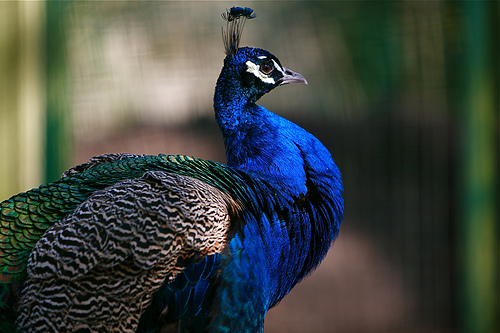

In [4]:
# Get the peacock at index 

from sisap2023.utils.mirflickr import get_mf_image

q0 = 101102 # a peacock

get_mf_image(q0)

In [5]:
from sisap2023.metrics.euc import euc

def getDists(query_index,allData):
    '''Return the distances from the query to allData'''
    '''Returns an array same dimension as allData of scalars'''
    mf_query_data = allData[query_index]
    distances = euc(mf_query_data, allData)
    return distances

In [6]:
from matplotlib import pyplot as plt

def imShow( image ):
    # plt.title(Image title")
    #plt.xlabel("X pixel scaling")
    # plt.ylabel("Y pixels scaling")

    fig = plt.figure(figsize = (1,1)) # in inches!
    plt.axis('off')
    plt.imshow(image) # figsize=(640/80,640/80), dpi=80)
    plt.show()

In [7]:
import numpy as np

dists = getDists(q0,allData)
closest_indices = np.argsort(dists) # the closest images to the query

best_100_for_one = closest_indices[0:100]

In [8]:
from sisap2023.utils.count_cats import get_best_cat_index

peacock_category = 84

best_100_categorical = get_best_cat_index(peacock_category,smData)
best_100_categorical = best_100_categorical[:100]

# These are the indices that might be chosen by a human ..

poly_query_indexes = best_100_categorical[0:6] # These are the indices we will use for the poly query


In [9]:
poly_query_indexes.shape


(6,)

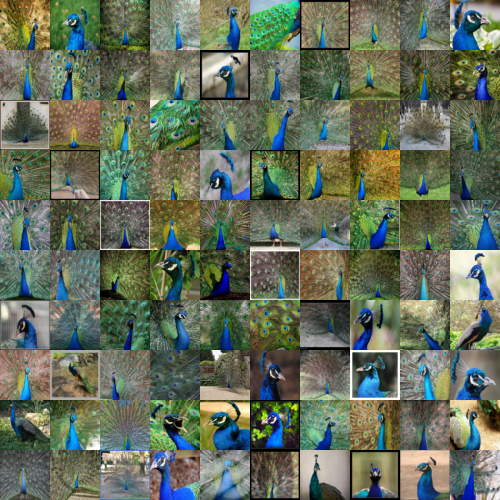

In [10]:
# These are the best images best on lowest average distance from the queries

from sisap2023.utils.mirflickr import make_mf_image_grid

make_mf_image_grid(best_100_categorical,10,10,50,50)

In [11]:

num_queries = len(poly_query_indexes)
fc6_poly_queries = allData[poly_query_indexes]

In [12]:
from sisap2023.metrics.msed import msed

import warnings
warnings.filterwarnings("error")

res = msed(fc6_poly_queries)

In [13]:

res

0.11093194782733917